# Errors, Curve Fitting, and Regression

In [1]:
# Python comments begin with '#'

import matplotlib.pyplot as plt   # Plotting library, renamed to 'plt'
import numpy as np                # Numeric and array library, renamed to 'np'
import pandas as pd               # Data loading and handling library, renamed to 'pd'
import seaborn as sns             # Fancy plotting libary, renamed to 'sns'



There are a couple of ways to fit data in Python. Some focus on fitting linear data (**linregress**), others can fit data to any function.

## Linregress

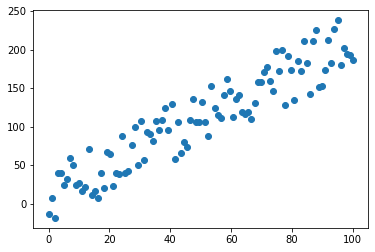

In [2]:
import random

xs = np.linspace(0,100,100)
ys = 2*xs + 10 + 80*(np.random.rand(100)-0.5)

plt.scatter(xs,ys)


LinregressResult(slope=1.9923283940787055, intercept=11.222146469021808, rvalue=0.9294064859148555, pvalue=3.2476521222112153e-44, stderr=0.07991649999551233)


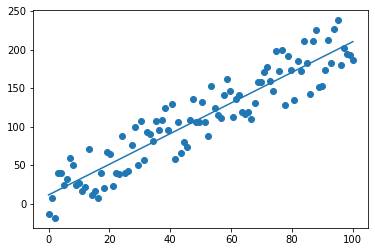

In [3]:
from scipy.stats import linregress

regression = linregress(xs,ys)
print(regression)

fit_ys = regression.slope*xs + regression.intercept


plt.scatter(xs,ys)
plt.plot(xs,fit_ys)

## Polyfit

Polyfit can be used to fit polynomial functions

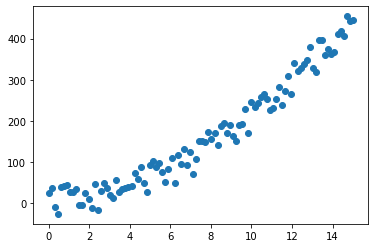

In [4]:
xs = np.linspace(0,15,100)
ys = 2*xs**2 + 10 + 80*(np.random.rand(100)-0.5)

plt.scatter(xs,ys)

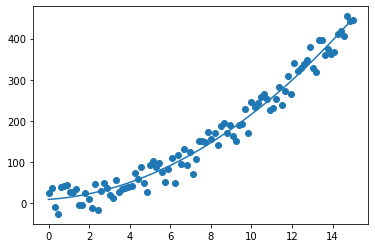

In [5]:
fit = np.polyfit(xs,ys,deg=2)
ys_fit = fit[0]*xs*xs + xs*fit[1] + fit[2]

plt.scatter(xs,ys)
plt.plot(xs,ys_fit)

## Curve Fit

Curve fit can try to fit data to any arbitrary function in python. Can be slow! May not converge! Requires initial guess!

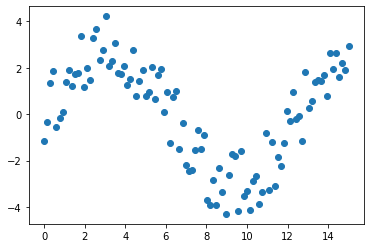

In [6]:
from scipy.optimize import curve_fit

ys = 3*np.sin(xs/2) + 3*(np.random.rand(100)-0.5)
plt.scatter(xs,ys)

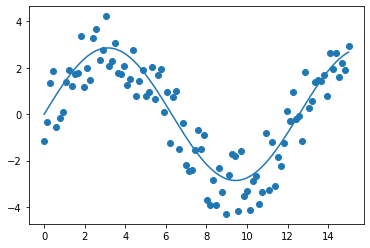

In [7]:
fig,axs = plt.subplots()

def fit_func(xs,a,b):
    ans = a*np.sin(xs / b)
    return ans

fit,cov = curve_fit(fit_func, xs,ys, p0=[4,2])  # P0 is initial guess, you should explore different values

ys_fit = fit_func(xs, fit[0], fit[1])

plt.scatter(xs,ys)
plt.plot(xs,ys_fit)



# Error Bars



There are several ways to include error bars:

* Specify a constant error for all measurments
* Have the error value be a separate column
* Have multiple values with the same parameters

In [8]:
error_data = pd.read_csv('data/error_data.csv')
error_data

,x,y,xerr,yerr
0,1,0.990000,0.1,1
1,2,4.600000,0.1,1
2,3,9.740000,0.1,2
3,4,15.720000,0.1,4
4,5,25.100000,0.1,5
5,6,34.533333,0.1,6
6,7,48.633333,0.1,6
7,8,60.800000,0.1,7


## Error bars from constant values

If error of measurement is a known constant, it can be directly used.

<AxesSubplot:xlabel='x'>

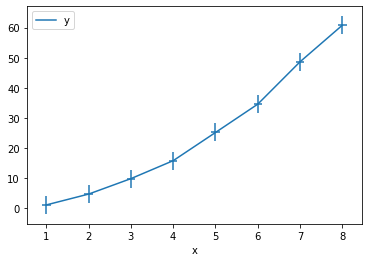

In [9]:
fig,ax = plt.subplots()

error_data.plot(x='x', y='y', ax=ax, yerr=3, xerr=0.1)

## Error Values for each value

If you know the errors for each value, they can be included as their own columns in the data

In [10]:
error_data2 = pd.read_csv('data/error_data_mult.csv')
error_data2

,x,y,xerr
0,1,1.260000,0.1
1,1,0.290000,0.1
2,1,1.240000,0.1
3,2,4.320000,0.1
4,2,6.233333,0.1
5,2,5.633333,0.1
6,3,10.000000,0.1
7,3,12.333333,0.1
8,3,10.766667,0.1
9,4,17.966667,0.1


<AxesSubplot:xlabel='x', ylabel='y'>

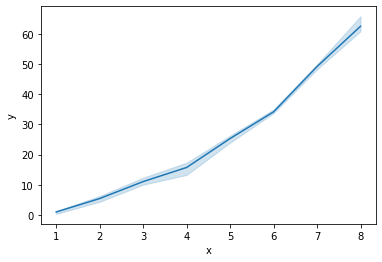

In [11]:
sns.lineplot(data=error_data2, x='x', y='y', err_style='band')

,count,mean,std,min,25%,50%,75%,max
x,,,,,,,,
1,3.0,0.930000,0.554346,0.290000,0.765000,1.240000,1.250000,1.260000
2,3.0,5.395556,0.978578,4.320000,4.976667,5.633333,5.933333,6.233333
3,3.0,11.033333,1.189304,10.000000,10.383333,10.766667,11.550000,12.333333
4,3.0,15.722222,2.376116,13.233333,14.600000,15.966667,16.966667,17.966667
5,3.0,25.333333,1.217009,23.966667,24.850000,25.733333,26.016667,26.300000
6,3.0,34.200000,0.693622,33.766667,33.800000,33.833333,34.416667,35.000000
7,3.0,49.255556,0.847436,48.333333,48.883333,49.433333,49.716667,50.000000
8,3.0,62.644444,2.877177,60.966667,60.983333,61.000000,63.483333,65.966667


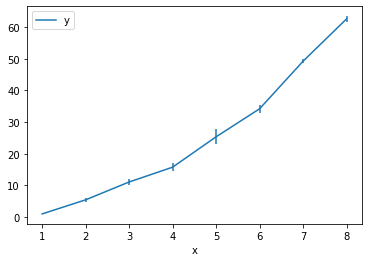

In [12]:
e2 = error_data2.groupby('x').mean().reset_index()
e2
e2['std'] = error_data2.groupby('x').std()['y']
e2.plot(x='x', y='y', yerr='std')
e2

error_data2.groupby('x')['y'].describe()

## Confidence Intervals

Ref: https://seaborn.pydata.org/generated/seaborn.regplot.html  
https://seaborn.pydata.org/generated/seaborn.lineplot.html  
https://seaborn.pydata.org/generated/seaborn.lmplot.html

In [13]:
samples = pd.read_csv('data/custom_Scatter_data.csv')
samples = samples.sort_values(by='x')

<AxesSubplot:xlabel='x', ylabel='y'>

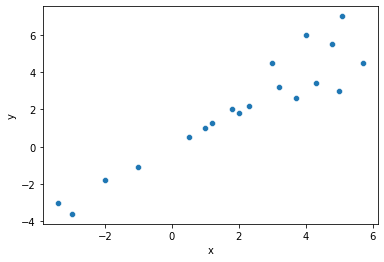

In [14]:
sns.scatterplot(data = samples, x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

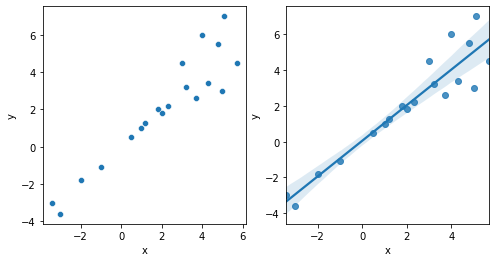

In [15]:
fig, axs = plt.subplots(1,2,figsize=(8,4))

sns.scatterplot(data=samples,x='x', y='y', ax=axs[0])
sns.regplot(data=samples, x='x', y='y', ci=95, ax=axs[1])

## Manual Bands

Bands can be added manually using the **ax.fill_between** function. The format of the function is as follows:

`ax.fill_between(x_values, upper_y_vals, lower_y_vals, alpha=0.2, color='black')`

(of course changing **color** and **alpha** to preferred values. **alpha** controls the opacity, **alpha=1** is completely opaque, **alpha = 0** is transparent.)

In this example, the band size is determined by a rolling standard deviation. This is the standard deviation using the current value and a certain number of neighbouring values, this is called the **window**. A larger **window** will give smoother results. 

You should consider yourself what is the best way to calculate the bands for your data.


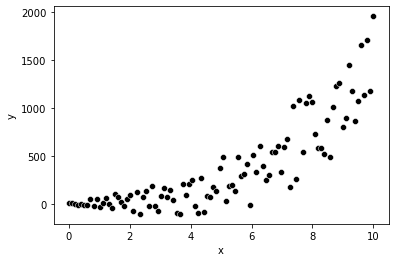

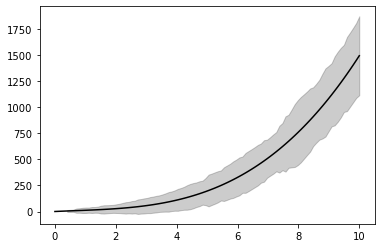

In [25]:
## Load cubic data file
df = pd.read_csv('data/custom_cubic_data.csv')

## Fit the data to a cubic polynomial
fit = np.polyfit(df['x'],df['y'],deg=3)

x = df['x']  ## for convenience, creating a variable for the x data
ys_fit = x**3*fit[0] + x**2*fit[1] + x*fit[2] + fit[3]

## Scatter plot of the data
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y', ax=ax, color='black')

## Plot the fit line
fig,ax = plt.subplots()
ax.plot(xs,ys_fit,color='black')

## Calculating the bands based on a rolling standard deviation (window size 25)
upper_band = ys_fit + df['y'].rolling(25, min_periods=5).std()
lower_band = ys_fit - df['y'].rolling(25, min_periods=5).std()

# Use the fill between function to create the bands.
ax.fill_between(xs, upper_band, lower_band, alpha=0.2, color='black')

# Warning about fitting data

Make sure you think about fitting your data. Know the shape of your data before you process it.

In [17]:
anscombe = sns.load_dataset("anscombe")

(0.0, 15.0)

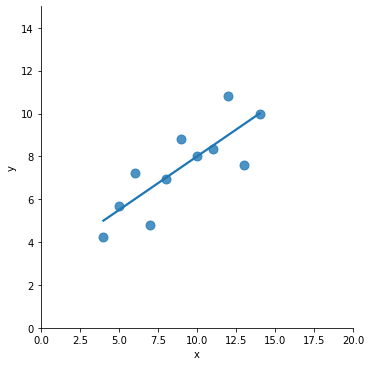

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None,
            scatter_kws={"s": 80});
plt.xlim(0,20)
plt.ylim(0,15)

(0.0, 15.0)

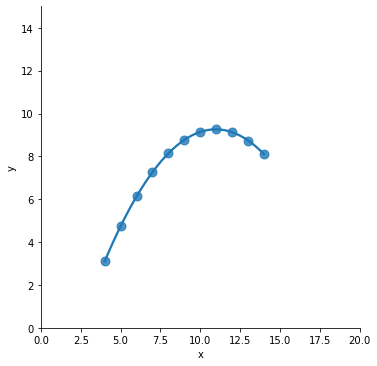

In [19]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None,order=2,
            scatter_kws={"s": 80});
plt.xlim(0,20)
plt.ylim(0,15)

(0.0, 15.0)

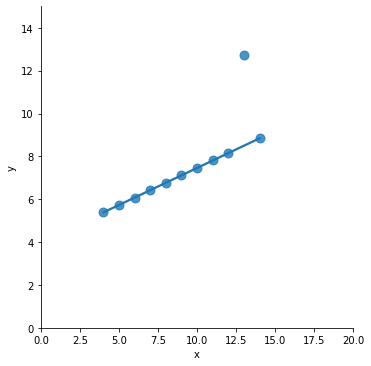

In [20]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None, robust=True,
            scatter_kws={"s": 80});
plt.xlim(0,20)
plt.ylim(0,15)

(0.0, 15.0)

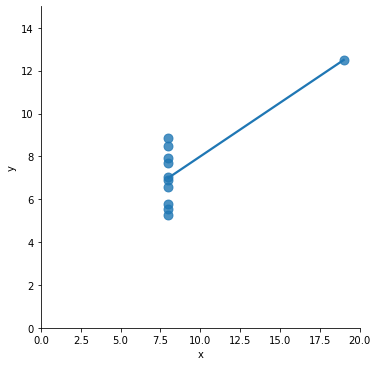

In [21]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"), ci=None, robust=True,
            scatter_kws={"s": 80});
plt.xlim(0,20)
plt.ylim(0,15)